In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [32]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [33]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


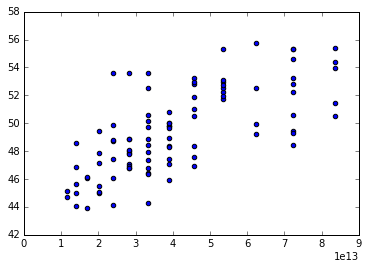

In [63]:
plt.scatter(train_data['x'], train_data['y'])
plt.show()

In [ ]:
test_data.head()

In [34]:
train_data.describe

<bound method NDFrame.describe of          x           y
0     24.0   21.549452
1     50.0   47.464463
2     15.0   17.218656
3     38.0   36.586398
4     87.0   87.288984
5     36.0   32.463875
6     12.0   10.780897
7     81.0   80.763399
8     25.0   24.612151
9      5.0    6.963319
10    16.0   11.237573
11    16.0   13.532902
12    24.0   24.603239
13    39.0   39.400500
14    54.0   48.437538
15    60.0   61.699003
16    26.0   26.928324
17    73.0   70.405206
18    29.0   29.340924
19    31.0   25.308952
20    68.0   69.029343
21    87.0   84.994847
22    58.0   57.043103
23    54.0   50.592199
24    84.0   83.027722
25    58.0   57.057527
26    49.0   47.958833
27    20.0   24.342264
28    90.0   94.684883
29    48.0   48.039707
..     ...         ...
670   84.0   82.889358
671   64.0   63.613650
672   12.0   11.296272
673   61.0   60.022749
674   75.0   72.603393
675   15.0   11.879646
676  100.0  100.701274
677   43.0   45.124208
678   13.0   14.811068
679   48.0   48.093680


In [35]:
train_data.dtypes

x    float64
y    float64
dtype: object

In [36]:
# Check the null values in the dataset
train_data.isnull().any()

x    False
y     True
dtype: bool

In [62]:
test_data.isnull().any()

x    False
y    False
dtype: bool

In [37]:
# Replace the nan values with mean of column 'x'
train_data['x'] = train_data['x'].replace(np.NaN, train_data['x'].mean())

In [38]:
# Replace the nan values with mean of column 'y'
train_data['y'] = train_data['y'].replace(np.NaN, train_data['y'].mean())

In [39]:
train_data.isnull().any()

x    False
y    False
dtype: bool

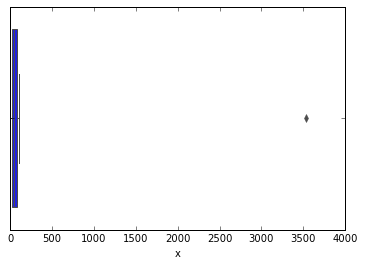

In [40]:
# Boxplot to find the outliers in the column 'x'
sb.boxplot(train_data['x'])

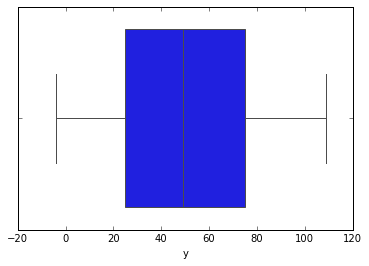

In [41]:
# Boxplot to find the outliers in the column 'y'
sb.boxplot(train_data['y'])

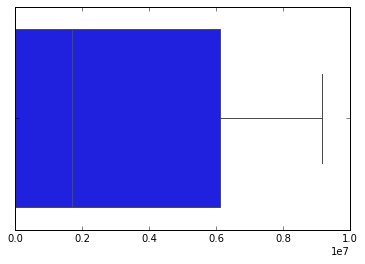

In [56]:
# Remove the outlier from the whole dataset
def remove_outlier(data):
    low = .25
    high = .75
    quant_df = data.quantile([low, high])
    for name in list(data.columns):
#         if is_numeric_dtype(data[name]):
            data = data[(data[name] > quant_df.loc[low, name]) & (data[name] < quant_df.loc[high, name])]
    return data

train_data= remove_outlier(train_data)
test_data = remove_outlier(test_data)
sb.boxplot(train_data)

/home/admin1/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


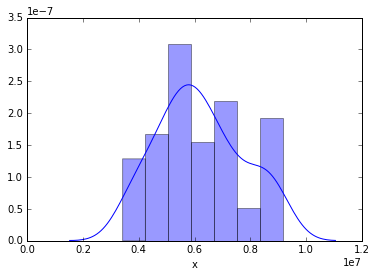

In [57]:
# Distplot of the feature varibale
sb.distplot(train_data['x'])

/home/admin1/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


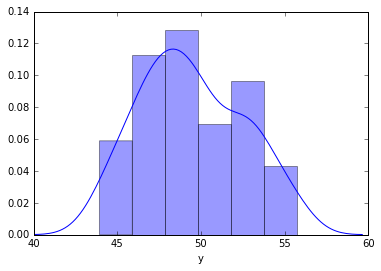

In [58]:
# Distplot of the feature varibale
sb.distplot(train_data['y'])

In [59]:
# Mean and median of the column 'x' 
print("Mean is", train_data['x'].mean(), ", Median is ", train_data['x'].median())

Mean is 6199608.368421053 , Median is  6250000.0


In [60]:
# Mean and median of the column 'y' 
print("Mean is", train_data['y'].mean(), ", Median is ", train_data['y'].median())

Mean is 49.44403333136842 , Median is  48.97302037


Skewness is 0.660615164916
Mean is 40758896325018.055 , Median is  39062500000000.0 which shows that column data are skwed data


/home/admin1/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


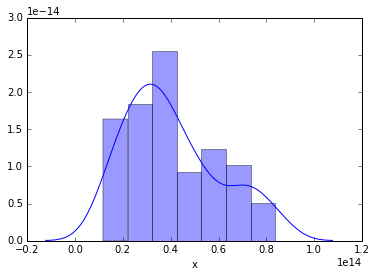

In [61]:
# feature variable
target = (np.square((train_data['x'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median(), "which shows that column data are skwed data")
sb.distplot(target)
train_data['x'] = target

In [75]:
class LinearRegression:
    def __init__(self):
        self.learning_rate = 0.1
        self.iteration = 1000

    def gradient_descent(self, x_data, y_data, slope = 0, intercept = 0):
        N = len(y_data)

        for i in range(N):
            y_current = (slope * x_data) + intercept
# 
            cost = sum([data**2 for data in (y_data - y_current)]) / N
            intercept_grad = (-2/N)*sum(y_data - y_current)
            slope_grad = (-2/N)*sum(x_data*(y_data - y_current))

            slope -= self.learning_rate * slope_grad
            intercept -= self.learning_rate * intercept_grad
        print("COST = ", cost)

        return slope, intercept, cost

    def test(self, x_data, slope, intercept):
        y_predict = [None]*len(x_data)
        for i in range(len(x_data)):
            y_predict[i] = slope*x_data[i] + intercept

        return y_predict

    def accuracy(self, y_data, y_predicted):
        diff = 0
        for i in range(len(y_data)):
            diff += abs((y_predicted[i] - y_data[i])/y_data[i])

        data_accuracy = diff*100
        return data_accuracy

def main():
    lr = LinearRegression()
    
    x_train_data = np.array(train_data["x"].values)
    y_train_data = np.array(train_data["y"].values)
    
    x_test_data = np.array(test_data["x"])
    y_test_data = np.array(test_data["y"])

    
    theta_0_arr, theta_1_arr, cost_arr = lr.gradient_descent(x_train_data, y_train_data)
    print(theta_0_arr, theta_1_arr)
    
    y_pred = lr.test(x_test_data, theta_0_arr, theta_1_arr)
    
    accuracy = lr.accuracy(y_test_data, y_pred)
    print("Accuracy is ", accuracy)

if __name__ == '__main__':
    main()